# Data Visualization

## Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random
import json

## Constants

In [13]:
PATH = "../"
IMAGES_PATH = PATH + "Dataset/images/"

csv_file = PATH + "Data/CSVs/dataset_caltech_yolo.csv"

predictions_file = PATH + "runs/detect/val/predictions.json"

In [14]:
category_mapping = {
    0: "bird",
    1: "cow",
    2: "domestic dog",
    3: "egyptian mongoose",
    4: "european badger",
    5: "european rabbit",
    6: "fallow deer",
    7: "genet",
    8: "horse",
    9: "human",
    10: "iberian hare",
    11: "iberian lynx",
    12: "red deer",
    13: "red fox",
    14: "wild boar",
}


In [15]:
# Load the files
df = pd.read_csv(csv_file)

with open(predictions_file, "r") as f:
    predictions_data = json.load(f)

## Functions

In [16]:
# Function to plot image with YOLO bounding box from original data
def plot_image_with_yolo_bbox(row):
    image_path = PATH + "Dataset/images/" + row['path']
    img = Image.open(image_path)
    img_width, img_height = img.size

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title(row['path'])

    bboxes = eval(row['bounding_boxes']) if isinstance(row['bounding_boxes'], str) else []
    for bbox in bboxes:
        class_label = bbox[0]
        x_center, y_center, width, height = [float(coord) for coord in bbox[1:]]
        x_min = (x_center - width / 2) * img_width
        y_min = (y_center - height / 2) * img_height
        width = width * img_width
        height = height * img_height
        
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        ax.text(x_min, y_min, row['class'], color='r', backgroundcolor='black', fontsize=8)

    ax.axis('off')
    plt.show()

In [17]:
# Convert bbox from [x-center, y-center, width, height] to [x1, y1, width, height]
def convert_box(bbox, img_width, img_height):
    x_center, y_center, width, height = bbox
    x_min = (x_center - width / 2) * img_width
    y_min = (y_center - height / 2) * img_height
    width = width * img_width
    height = height * img_height

    return x_min, y_min, width, height

In [18]:
unique_image_ids = []
[unique_image_ids.append(prediction["image_id"]) for prediction in predictions_data if prediction["image_id"] not in unique_image_ids]

print(unique_image_ids)

['40_20201024 (1)', '4_20221125 (48)', '4_20221127 (568)', '4_20221127 (633)', '4_20221127 (695)', '4_20221127 (698)', '4_20221130 (995)', '4_20221201 (1072)', '4_20221202 (1173)', '4_20221202 (1190)', '4_20221202 (1191)', '4_20221204 (1301)', '4_20221204 (1302)', '4_20221204 (1308)', '4_20221205 (1317)', '4_20221205 (1331)', '4_20221125 (3)', '39_20230104 (522)', '39_20221229 (371)', '39_20221217 (232)', '35_20221212 (621)', '35_20230106 (2127)', '35_20230113 (2282)', '35_20230114 (2408)', '35_20230114 (2421)', '35_20230118 (2646)', '4_20221205 (1336)', '36_20221126 (1)', '38_20221125 (4)', '38_20221125 (7)', '38_20221213 (81)', '38_20221214 (131)', '38_20221214 (190)', '38_20221214 (216)', '38_20221214 (310)', '36_20221220 (394)', '35_20221203 (594)', '4_20221206 (1361)', '4_20221210 (1604)', '41_20221124 (7)', '41_20221214 (61)', '41_20230118 (317)', '42_20221130 (37)', '42_20230118 (86)', '44_20221124 (8)', '44_20221212 (93)', '45_20221124 (3)', '45_20221215 (107)', '45_20221229 (1

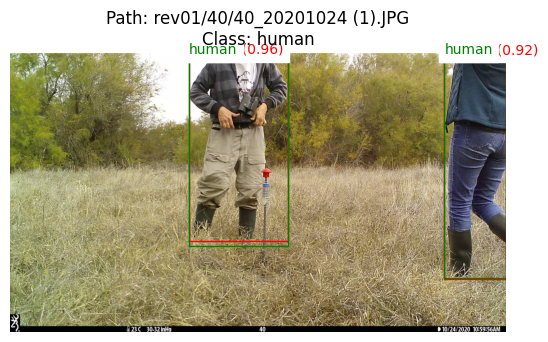

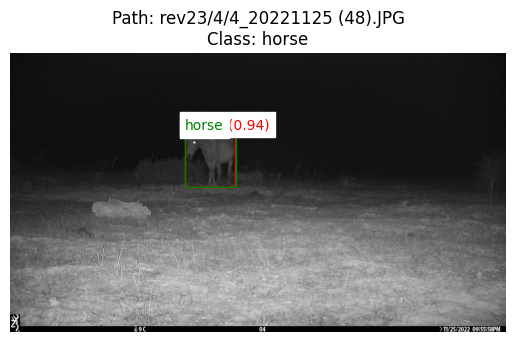

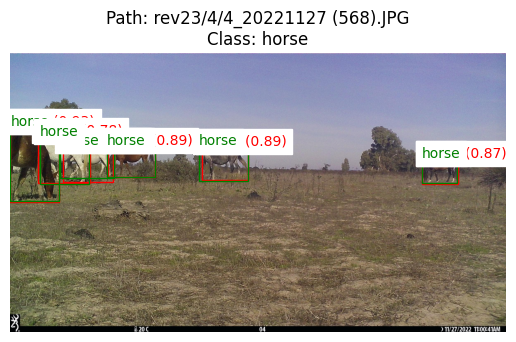

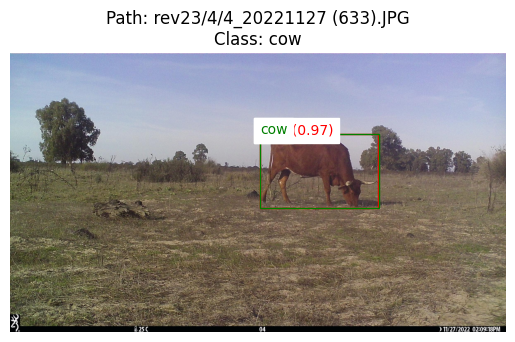

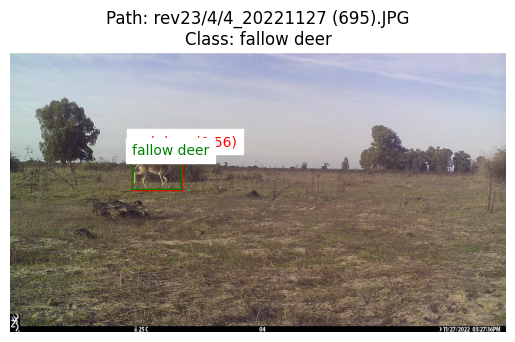

In [74]:
# Iterate through predictions
for image_id in unique_image_ids[:5]:  # Change the number of predictions you want to process

    # Find corresponding row in CSV
    csv_row = df[df["path"].str.contains(image_id, regex=False)]

    gt_bboxes = eval(csv_row["bounding_boxes"].values[0])

    filtered_predictions = [prediction for prediction in predictions_data if prediction["image_id"] == image_id]

    # Initialize lists to store the extracted fields
    category_ids = []
    scores = []
    bboxes = []

    # Loop through filtered predictions to extract fields
    for prediction in filtered_predictions:
        category_id = prediction["category_id"]
        score = prediction["score"]
        bbox = prediction["bbox"]

        category_ids.append(category_id)
        scores.append(score)
        bboxes.append(bbox)

    if not csv_row.empty:
        image_path = IMAGES_PATH + csv_row["path"].values[0]

        # Load image
        img = Image.open(image_path)
        img_width, img_height = img.size

        fig, ax = plt.subplots()
        ax.imshow(img)

        for idx, bbox in enumerate(bboxes):

            category_id = category_ids[idx]
            category_name = category_mapping.get(category_id, "Unknown")
            score = scores[idx]

            rect = patches.Rectangle(
                (bbox[0], bbox[1]), 
                bbox[2], 
                bbox[3], 
                linewidth=1, 
                edgecolor='r', 
                facecolor='none')
            
            ax.add_patch(rect)

            # Show class and score on plot
            plt.text(
                bbox[0], 
                bbox[1],
                f"{category_name} ({score:.2f})",
                color="r",
                backgroundcolor="white",
            )
        
        # Ground Truth boxes
        for bbox in gt_bboxes:

            category_id = bbox[0]
            category_name = category_mapping.get(category_id, "Unknown")

            bbox = convert_box(bbox[1:], img_width, img_height)

            rect = patches.Rectangle(
                (bbox[0], bbox[1]), 
                bbox[2], 
                bbox[3], 
                linewidth=3, 
                edgecolor='g',
                alpha=0.5, 
                facecolor='none')
            
            ax.add_patch(rect)

            # Show class and score on plot
            plt.text(
                bbox[0], 
                bbox[1],
                f"{category_name}",
                color="g",
                alpha=0.5,
                backgroundcolor="white",
            )

        # Set title
        title = f"Path: {csv_row['path'].values[0]}\nClass: {category_name}"
        ax.set_title(title)

        # Show plot
        plt.axis("off")
        plt.show()


## Main Code

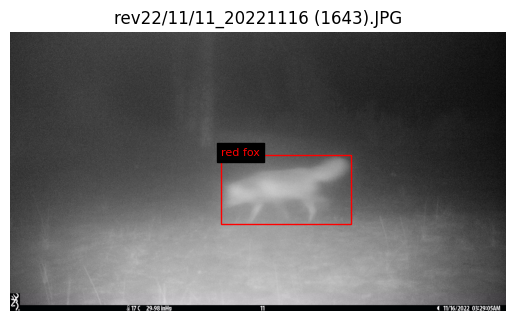

In [20]:
# Select a random row
random_row = df.sample(n=1, random_state=random.randint(0, 1000)).iloc[0]

# Plot the random image with YOLO bounding box
plot_image_with_yolo_bbox(random_row)